In [1]:
import random, pathlib, time, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from util import filter_all_ds, slice_ds, training

In [19]:
nuc_labels = ['VM','BM','CT'] # ordered as nucs 1 2 3

nuc = nuc_labels[0]

ds = pd.read_pickle(f'nuc{nuc}_dataset.pickle')
train_set = ds
model = training( train_set, 30 , m='poly' )

# The params modeling the KPIs are ordered as in the training set: [power, cpu, mbps]
# Print with the order [cpu,mbps,power]
for i in range(len(model.params[1])):
    print(f'{model.params[1][i]:.3e} \t {model.params[2][i]:.3e} \t {model.params[0][i]:.3e}')


1.018e+01 	 -5.136e+01 	 6.749e+03
6.310e-01 	 1.673e+00 	 4.805e+02
6.678e-03 	 -3.250e-02 	 -2.442e+00
-4.890e-05 	 1.833e-04 	 4.604e-05
5.865e-02 	 1.353e+00 	 5.194e+01
8.642e-04 	 1.858e-03 	 -7.572e-01
-7.402e-06 	 -2.839e-06 	 3.229e-03
-8.002e-05 	 -4.160e-04 	 -1.445e-02
-3.956e-07 	 -1.308e-05 	 1.816e-04
3.931e-08 	 -9.179e-09 	 -1.669e-05


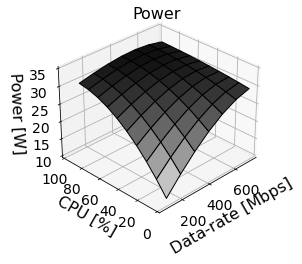

In [22]:
# Plot predictions with Polyfit
bwtlist = np.arange(100, 800, 100) 
cpulist = np.arange(0 , 100, 10 )
idx_pred_power = 0
zlimits = [10,35]
fontsize = 16

test = np.array(np.meshgrid(cpulist, bwtlist)).T.reshape(-1, 2)
pred = model.predict(test)
X, Y = np.meshgrid(bwtlist, cpulist)
Z = np.reshape( pred[:,idx_pred_power] , (-1, len(bwtlist)))

fig  = plt.figure( figsize=(16,4) )
ax  = fig.add_subplot( 1,1,1 , projection='3d')
surf = ax.plot_surface(X, Y, Z/1000, cmap='binary', linewidth=1, antialiased=True,  vmin=zlimits[0], vmax=zlimits[1], edgecolor='black')
ax.view_init(elev=30, azim=45+180)
ax.set_zlim( zlimits ), ax.set_ylim([0,100]), ax.set_xlim([50,750])
ax.set_title( f'Power', fontsize=fontsize , y=1)
ax.set_xlabel( "Data-rate [Mbps]", fontsize=fontsize) , ax.set_ylabel( "CPU [%]", fontsize=fontsize ), ax.set_zlabel( 'Power [W]', fontsize=fontsize )
ax.tick_params(axis='both', which='major', labelsize=fontsize-2)